# Выявление закономерностей, определяющих успешность компьютерной игры 

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b> Цель исследования: </b>

1. Выявить определяющие успешность игры закономерности.
2. Отработать принцип работы с данными.

<b> Ход исследования: </b>

Данные о компьютерных играх я получу из файла '/datasets/games.csv'. О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
Я проверю данные на ошибки и оценю из влияние на исследование. Затем, на этапе предработки я поищу возмодность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению анализа.

Таким образом, моё исследование пройдёт в шесть этапов:

* Обзор данных
* Предобработка данных
* Проведение исследовательского анализа данных
* Составление портрета пользователя каждого региона
* Проверка гипотез
* Написание общего вывода

### 1. Обзор данных

In [1]:
import pandas as pd
data = pd.read_csv('games.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<b> Описание данных </b>
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### 2. Предобработка данных

<b> Приведем название стобцов к нижнему регистру </b>

In [2]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<b> Преобразуем данные в нужные типы. </b>

In [3]:
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format = '%Y')
#data['user_score'] = data['user_score'].astype('float')

Столбец с годом выпуска игры можно было бы преобразовать из float в datetime, но в дальнейшем это создаст дополнитеьные трудности из-за того, что в типе datetime значения выводились бы с днём и месяцем, например: 01-01-1987. Столбец user_score является object, но должен быть float. Изменить его тип данных не удалось, в связи с тем, что столбец в некоторых строках имеет значение 'tbd'

In [4]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

'tdb'- аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Поэтому будем считать данное значение пустым, изменим на None и изменим тип данных на float.

In [5]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None
data['user_score'] = data['user_score'].astype('float')
print(data['user_score'].unique())
data.dtypes

[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

<b> Так же проверим все остальные столбцы на аномалии. </b>

In [6]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [7]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [9]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Посмотрим на строки с пустыми значениеями в столбце 'genre'

In [10]:
data.loc[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы получили практически пустые строки, которые можно удалить

In [11]:
data.drop(index=data.loc[data['genre'].isna()].index, inplace = True)

In [12]:
data['na_sales'].unique()

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

In [13]:
data['eu_sales'].unique()

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

In [14]:
data['jp_sales'].unique()

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

In [15]:
data['other_sales'].unique()

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

In [16]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
data['user_score'].unique() 

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [18]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В возрастных категориях есть обозначение 'K-A' (Kids to Adults), что означает «Для всех» и является старым названием для 'E' (Everyone). Поэтому есть смысл заменить все значения 'K-A' на 'E'.

In [19]:
data['rating'] = data['rating'].replace('K-A', 'E')
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [20]:
data['rating'].fillna('0', inplace=True)
data['rating'].unique()

array(['E', '0', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Все остальные данные в порядке.

Проверим данные на явные дубликаты.

In [21]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Явных дубликатов не обнаружено

С помощью методов .isna().sum() посмотрим в каких столбцах есть пропуски и посчитаем их в процентном соотношении от общего количества записей.

In [22]:
data.isna().sum() / len(data) * 100

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating              0.000000
dtype: float64

Столбец 'year_of_release' имеет всего лишь 1.6% пустых значений, поэтому можно смело удалить все пропуски.

In [23]:
data.dropna(subset = ['year_of_release'], inplace = True)

Столбцы 'critic_score', 'user_score', 'rating' имеют 51%, 55% и 40% пропусков соответственно, что очень много. Заполнять рейтинги игр средним или медианым значением считаю неправильно, т.к. рейтинг не зависит ни от чего, кроме как субъективных мнений людей.

<b> Посчёт суммарных продаж во всех регионах </b>

In [24]:
data['sum_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<b> Вывод </b>

На стадии предобработки данных мы подготовили данные для последующего исследования:
* Изменили регистр в названии столбцов. 
* Столбец с годом выпуска игры преобразовали из float в datetime, столбец с оценками пользователей преобразовали из object в float. 
* Избавились от аномалии в столбце с оценками пользователей в виде строки.
* Проверили данные на явные дубликаты.
* Добавили столбец 'sum_sales' с сумарными продажами во всех регионах.
* Пропуски в столбце 'year_of_release' возможны из-за того, что игра была анонсирована, но ещё не дошла до релиза. В столбцах 'critic_score' и 'user_score' пропуски возможны из-за какого-либо вида цензуры. Иногда встречаются такие ситуации, когда платформы не стесняются убирать низкий пользовательский рейтинг, оставляя положительные оценки критиков, и наоборот. Система ESRB осуществляет свою деятельность в США и Канаде. Пропуски в столбце 'rating' могут означать то, что игра разрабатывалась не для западного рынка и ей просто не был присвоен рейтинг этой организации.

### 3. Исследовательский анализ данных

<b> Посчёт количества игр, вышедших в разные года </b>

In [25]:
count_games = data.groupby('year_of_release')['name'].count()
count_games

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

Данные за все периоды нужны лишь для выявления динамики разработки игр, выпуска и устаревания платформ. Для прогноза продаж 2017 год достаточно будет небольшого периода.

<b> Посчёт количества игр, вышедших в разные года по платформам</b>

In [26]:
count_games_platform = data.groupby(['platform', 'year_of_release'])['name'].count()
with pd.option_context('display.max_rows', None):
    print(count_games_platform)

platform  year_of_release
2600      1980.0               9
          1981.0              46
          1982.0              36
          1983.0              11
          1984.0               1
          1985.0               1
          1986.0               2
          1987.0               6
          1988.0               2
          1989.0               2
3DO       1994.0               1
          1995.0               2
3DS       2011.0             116
          2012.0              93
          2013.0              91
          2014.0              80
          2015.0              86
          2016.0              46
DC        1998.0               7
          1999.0              14
          2000.0              20
          2001.0               8
          2002.0               1
          2007.0               1
          2008.0               1
DS        1985.0               1
          2004.0              23
          2005.0             118
          2006.0             201
          2007.0 

Построим график суммарных продаж для каждой платформы за все года

<Axes: title={'center': 'Суммарные продажи по платформам'}, xlabel='Платформа', ylabel='Количество продаж'>

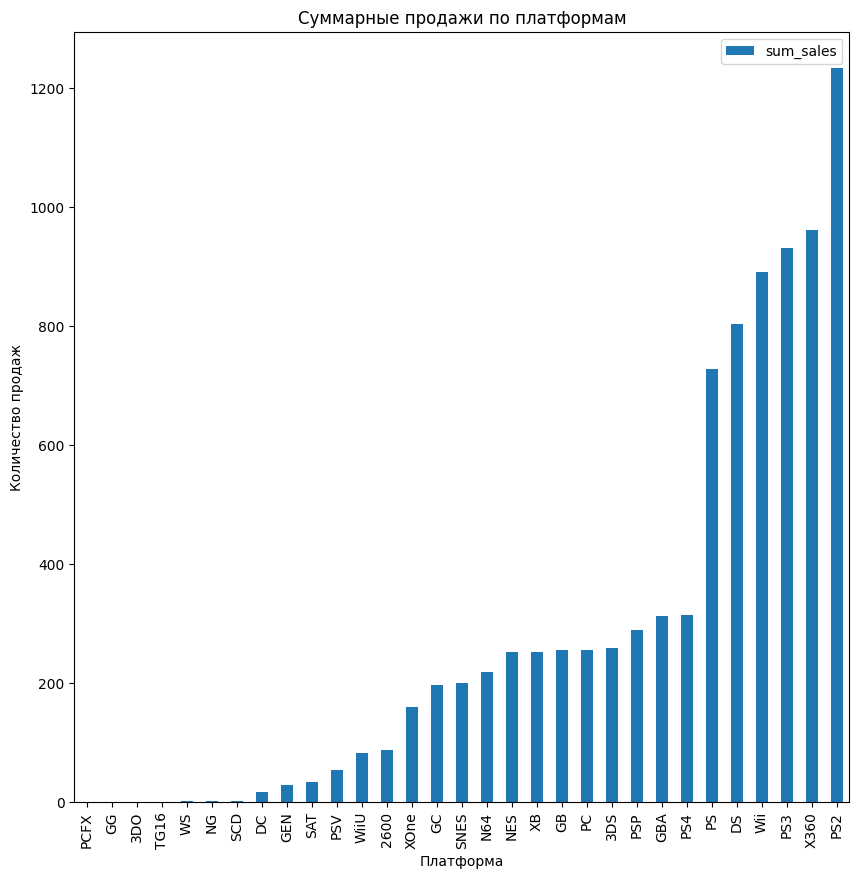

In [27]:
data.groupby(['platform'])[['sum_sales']].sum().sort_values(by=['sum_sales']).plot.bar(title = "Суммарные продажи по платформам", xlabel = "Платформа", ylabel = "Количество продаж", figsize=(10, 10))

Теперь выберем платформы с наибольшими суммарными продажами и построими график распределения по годам. 
Платформы с наибольшими суммарными продажами:
* PS
* DS
* Wii
* PS3
* X360
* PS2

<Axes: title={'center': 'Распределение количества продаж для платформ с наибольшими суммарными продажами по годам'}, xlabel='Год релиза', ylabel='Количество продаж'>

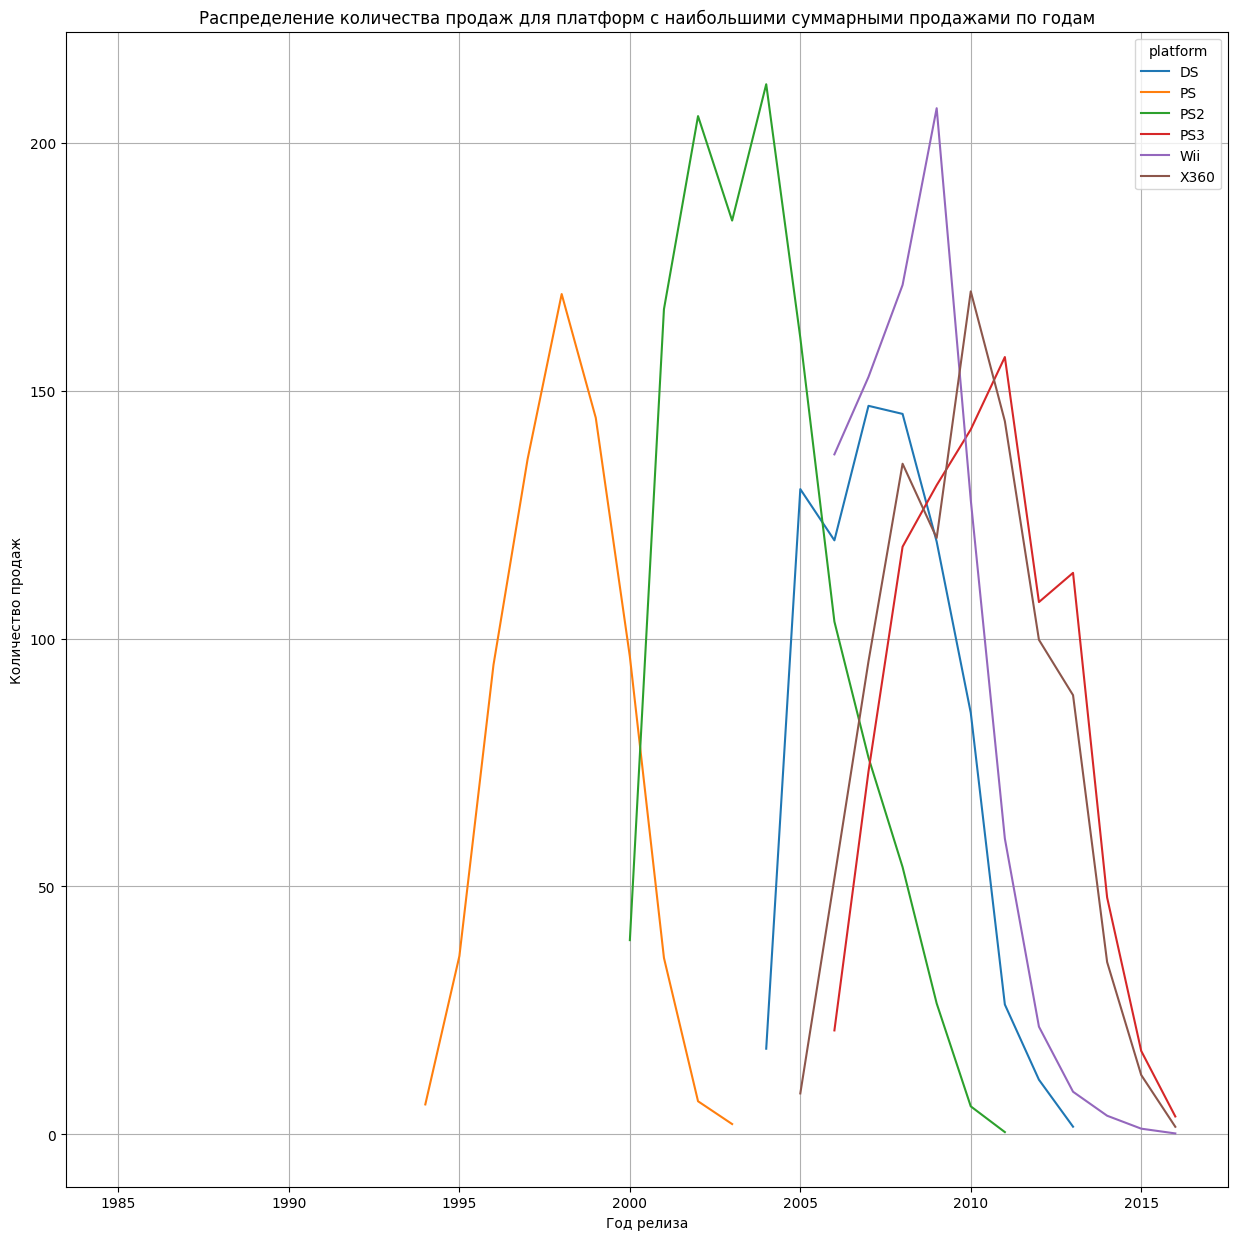

In [28]:
dataquery = data.query("platform == 'PS' or platform == 'DS' or platform == 'Wii' or platform == 'PS3' or platform == 'X360' or platform == 'PS2'")
dataquery.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(title = "Распределение количества продаж для платформ с наибольшими суммарными продажами по годам", xlabel = "Год релиза", ylabel = "Количество продаж", grid=True, figsize=(15, 15))

Судя по построенному распределению, можно выявить <b>характерный срок появления новых и исчезновенения старых платформ - 10 лет.</b>

Но эти данные не помогут построить прогноз на 2017 год. Необходимо взять данные за актуальный период. Построим аналогичное распределение количества продаж по годам для всех платформ.

<Axes: title={'center': 'Распределение количества продаж по годам'}, xlabel='Год релиза', ylabel='Количество продаж'>

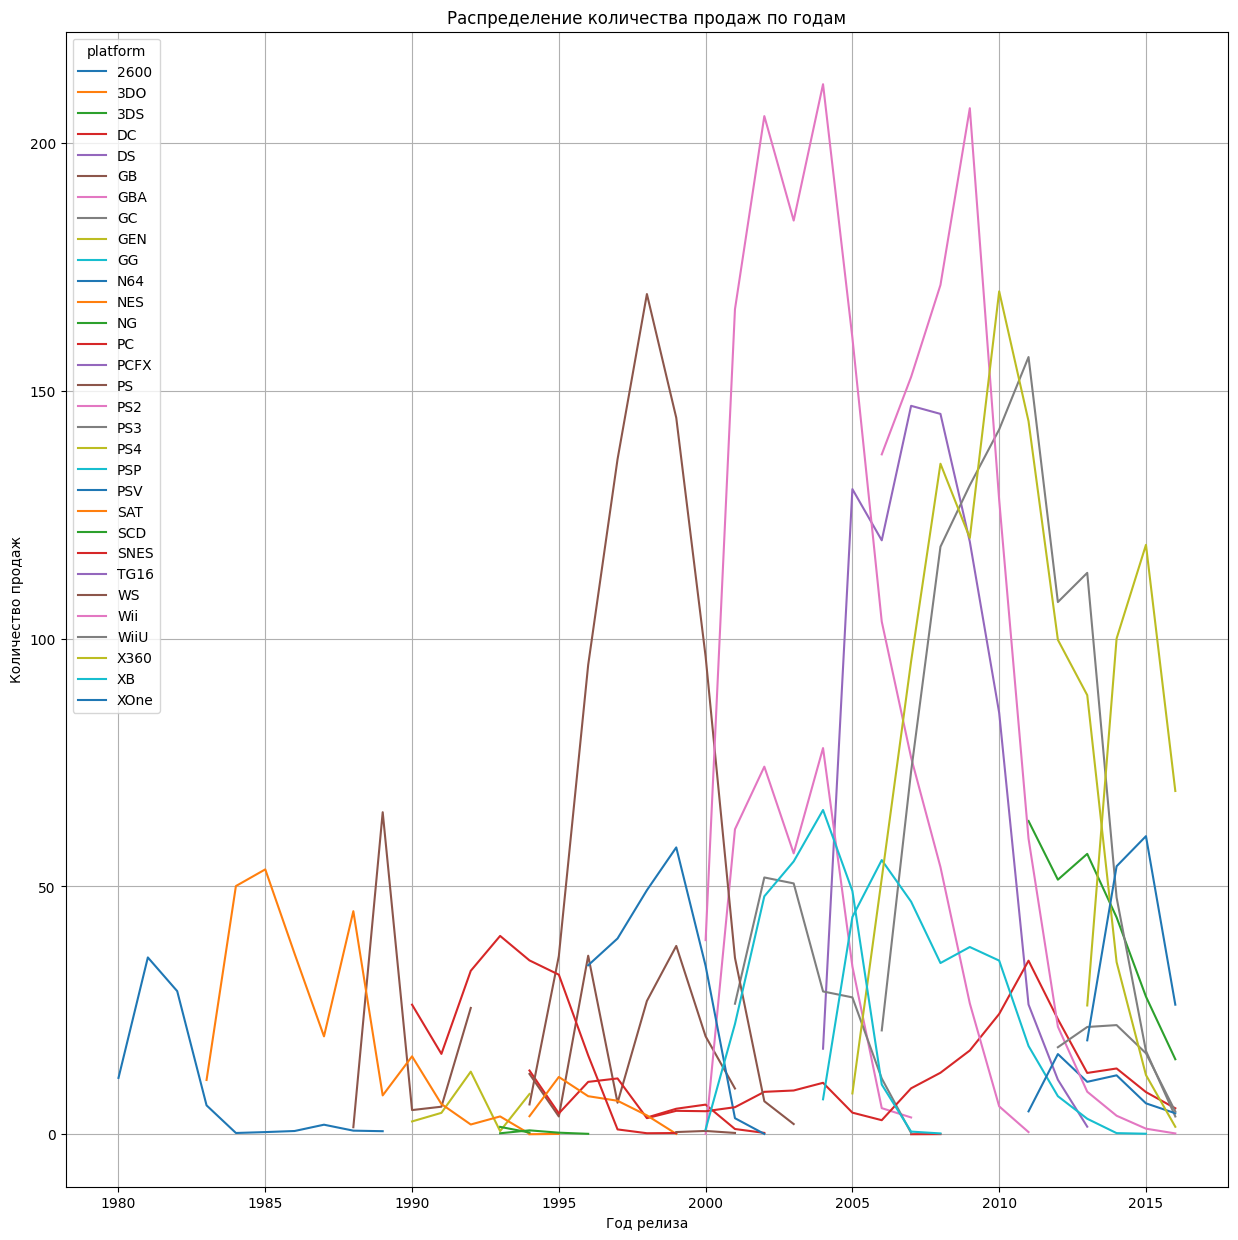

In [29]:
data.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(title = "Распределение количества продаж по годам", xlabel = "Год релиза", ylabel = "Количество продаж", grid=True, figsize=(15, 15))

Если судить по количеству вышедших игр и количеству продаж в последние года, то можно выделить 2013 год, в котором появились актуальные на 2016 год платформы: PS4 и XOne. Поэтому есть основания полагать, что актуальным периодом будет 2014 - 2016 года. В дальнейшем мы отсеем старые платформы, на которые разработчики уже не делают игры, и оставим актуальные. 

In [30]:
data = data.query("2014 <= year_of_release <= 2016")

Посмотрим на наш срез данных по платформам

In [31]:
data['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [32]:
for platform in data['platform'].unique():
    print(platform, data[data['platform'] == platform]['name'].count())

PS4 376
3DS 212
XOne 228
WiiU 73
PS3 219
X360 111
PC 151
Wii 11
PSV 295
PSP 13


In [33]:
data[data['platform']=='Wii']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
850,Just Dance 2015,Wii,2014.0,Misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
2179,Just Dance 2016,Wii,2015.0,Misc,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
2180,Skylanders: Trap Team,Wii,2014.0,Action,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
3611,FIFA 15,Wii,2014.0,Sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56
7991,How to Train Your Dragon 2,Wii,2014.0,Adventure,0.04,0.13,0.0,0.01,NaN,NaN,E10+,0.18
8009,Just Dance 2017,Wii,2016.0,Misc,0.06,0.11,0.0,0.01,NaN,NaN,E10+,0.18
8941,Skylanders: SuperChargers,Wii,2015.0,Action,0.02,0.12,0.0,0.01,NaN,NaN,0,0.15
13570,Disney Planes Fire & Rescue,Wii,2014.0,Action,0.00,0.04,0.0,0.00,NaN,NaN,0,0.04
14682,Barbie and Her Sisters Puppy Rescue,Wii,2015.0,Action,0.00,0.03,0.0,0.00,NaN,NaN,E,0.03
16144,Penguins of Madagascar,Wii,2014.0,Action,0.00,0.01,0.0,0.00,NaN,NaN,E,0.01


In [34]:
data[data['platform']=='PSP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
11107,Pro Yaky? Spirits 2014,PSP,2014.0,Sports,0.0,0.0,0.09,0.0,NaN,NaN,0,0.09
11486,Uta no Prince-Sama: All Star After Secret,PSP,2015.0,Action,0.0,0.0,0.08,0.0,NaN,NaN,0,0.08
13451,Toukiden Kiwami,PSP,2014.0,Action,0.0,0.0,0.05,0.0,NaN,NaN,0,0.05
15026,Juusanshi Engi Engetsu Sangokuden 2,PSP,2014.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,0,0.02
15508,Gakuen K: Wonderful School Days,PSP,2014.0,Adventure,0.0,0.0,0.02,0.0,NaN,NaN,0,0.02
15996,Harukanaru Toki no Naka de 6,PSP,2015.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,0,0.02
16069,Meiji Toukyou Renka: Twilight Kiss,PSP,2015.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,0,0.02
16129,Shinobi Koutsutsu,PSP,2014.0,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,0,0.01
16233,Geten no Hana: Yume Akari,PSP,2014.0,Misc,0.0,0.0,0.01,0.0,NaN,NaN,0,0.01
16313,Bakumatsu Rock,PSP,2014.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,0,0.01


Платформы Wii и PSP имеют слишком мало игр и много пропусков, поэтому мы удалим строки с этими платформами.

In [35]:
data.drop(index=data.loc[data['platform']=='Wii'].index, inplace = True)
data.drop(index=data.loc[data['platform']=='PSP'].index, inplace = True)

Теперь снова построим график суммарных продаж для каждой платформы за актуальный период

<Axes: title={'center': 'Суммарные продажи по платформам'}, xlabel='Платформа', ylabel='Количество продаж'>

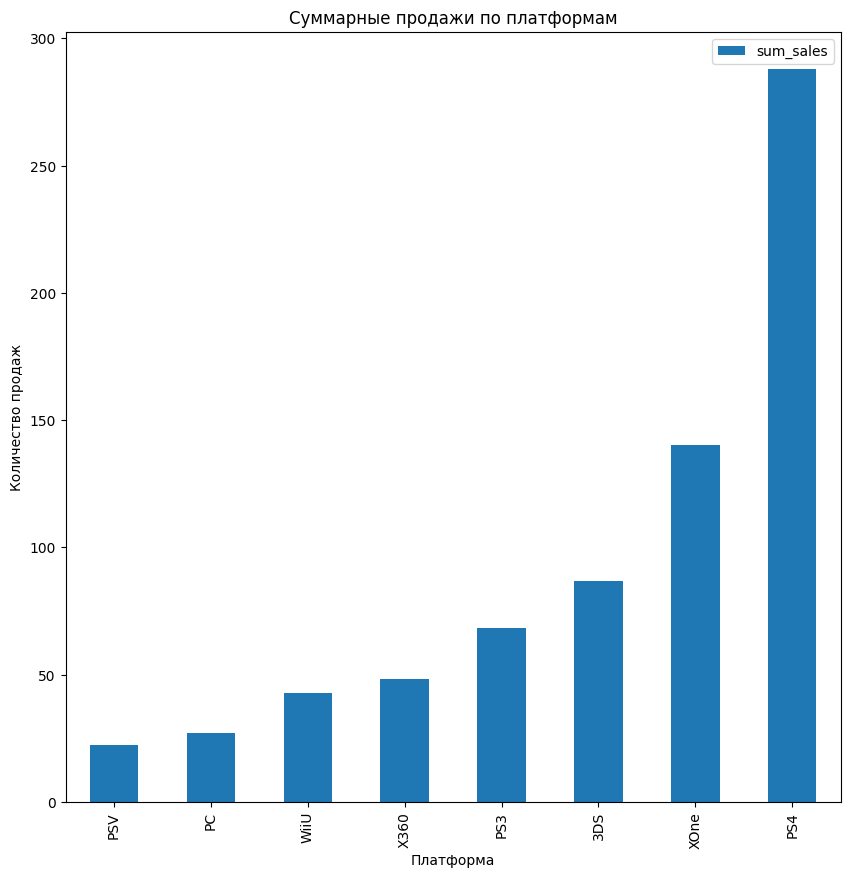

In [36]:
data.groupby(['platform'])[['sum_sales']].sum().sort_values(by=['sum_sales']).plot.bar(title = "Суммарные продажи по платформам", xlabel = "Платформа", ylabel = "Количество продаж", figsize=(10, 10))

<Axes: title={'center': 'Распределение количества продаж по годам'}, xlabel='Год релиза', ylabel='Количество продаж'>

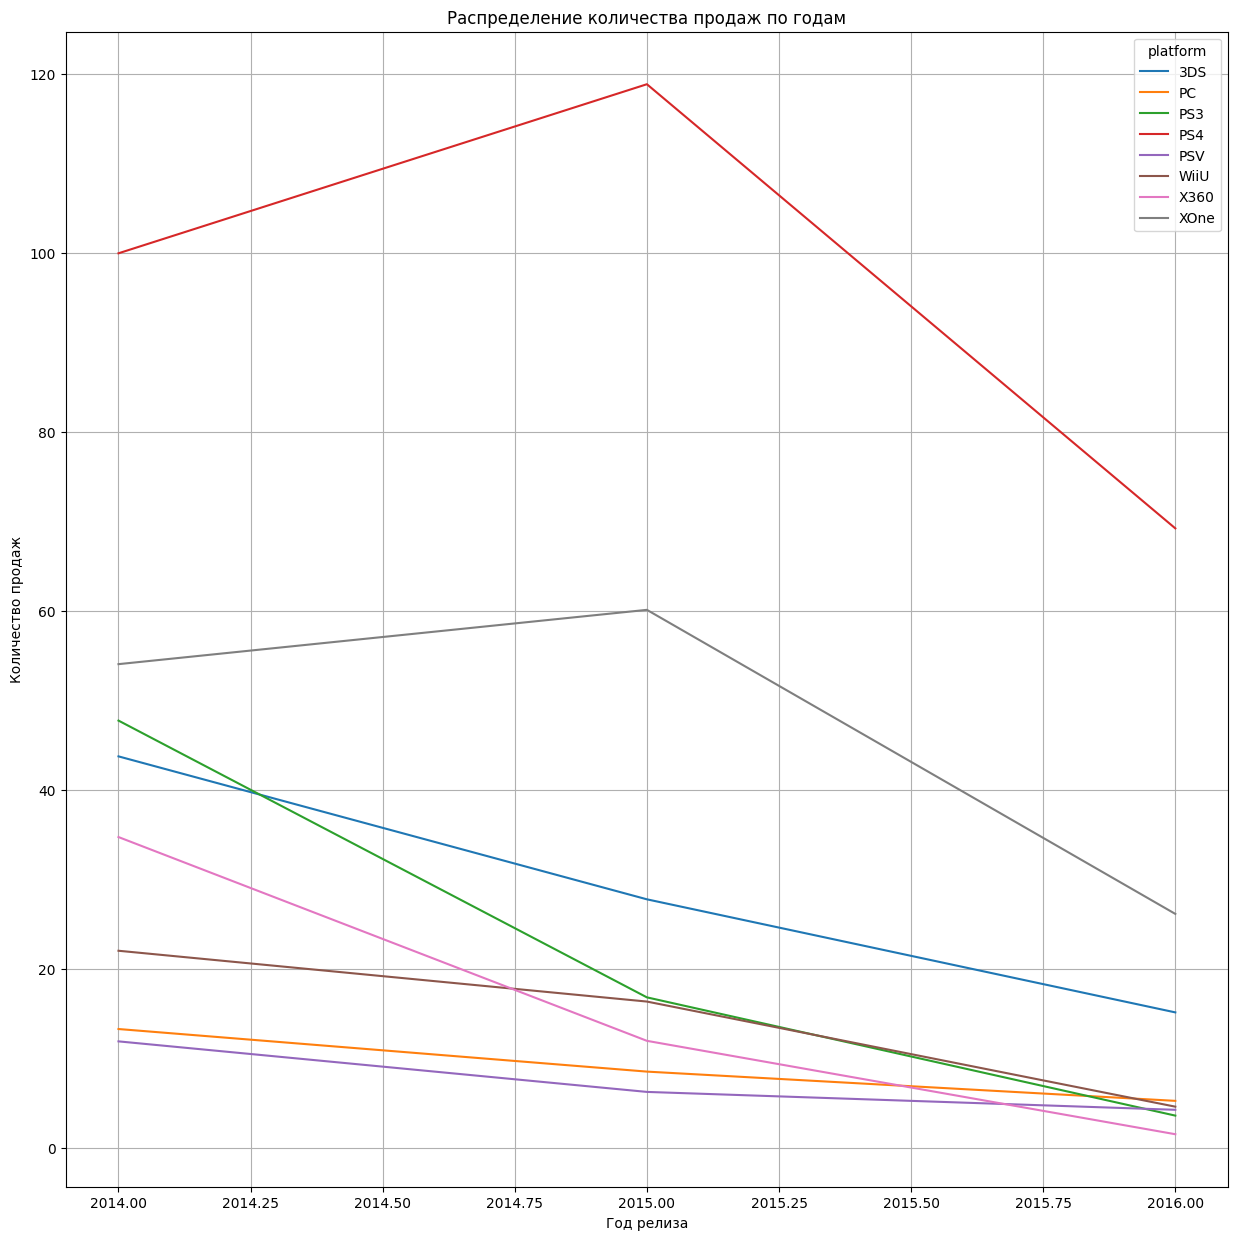

In [37]:
data.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(title = "Распределение количества продаж по годам", xlabel = "Год релиза", ylabel = "Количество продаж", grid=True, figsize=(15, 15))

Можно заметить, что общие продажи по всем платформам падают, но можно выявить двух лидеров: <b> PS4 </b> и <b> XOne</b>. <i> Эти две платформы и будут являться потенциально прибыльными. </i>

<b> Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам </b>

          count      mean       std   min     25%    50%     75%    max
platform                                                               
3DS       212.0  0.408868  1.188368  0.01  0.0300  0.090  0.2500  11.68
PC        151.0  0.179139  0.329359  0.01  0.0200  0.060  0.2000   3.05
PS3       219.0  0.311324  0.633059  0.01  0.0400  0.110  0.3250   5.27
PS4       376.0  0.766356  1.614969  0.01  0.0575  0.185  0.6900  14.63
PSV       295.0  0.075932  0.141591  0.01  0.0200  0.040  0.0900   1.96
WiiU       73.0  0.588767  1.161467  0.01  0.0500  0.190  0.5700   7.09
X360      111.0  0.434414  0.628967  0.01  0.0700  0.180  0.5050   4.28
XOne      228.0  0.615614  1.046513  0.01  0.0500  0.205  0.6325   7.39


(0.0, 2.0)

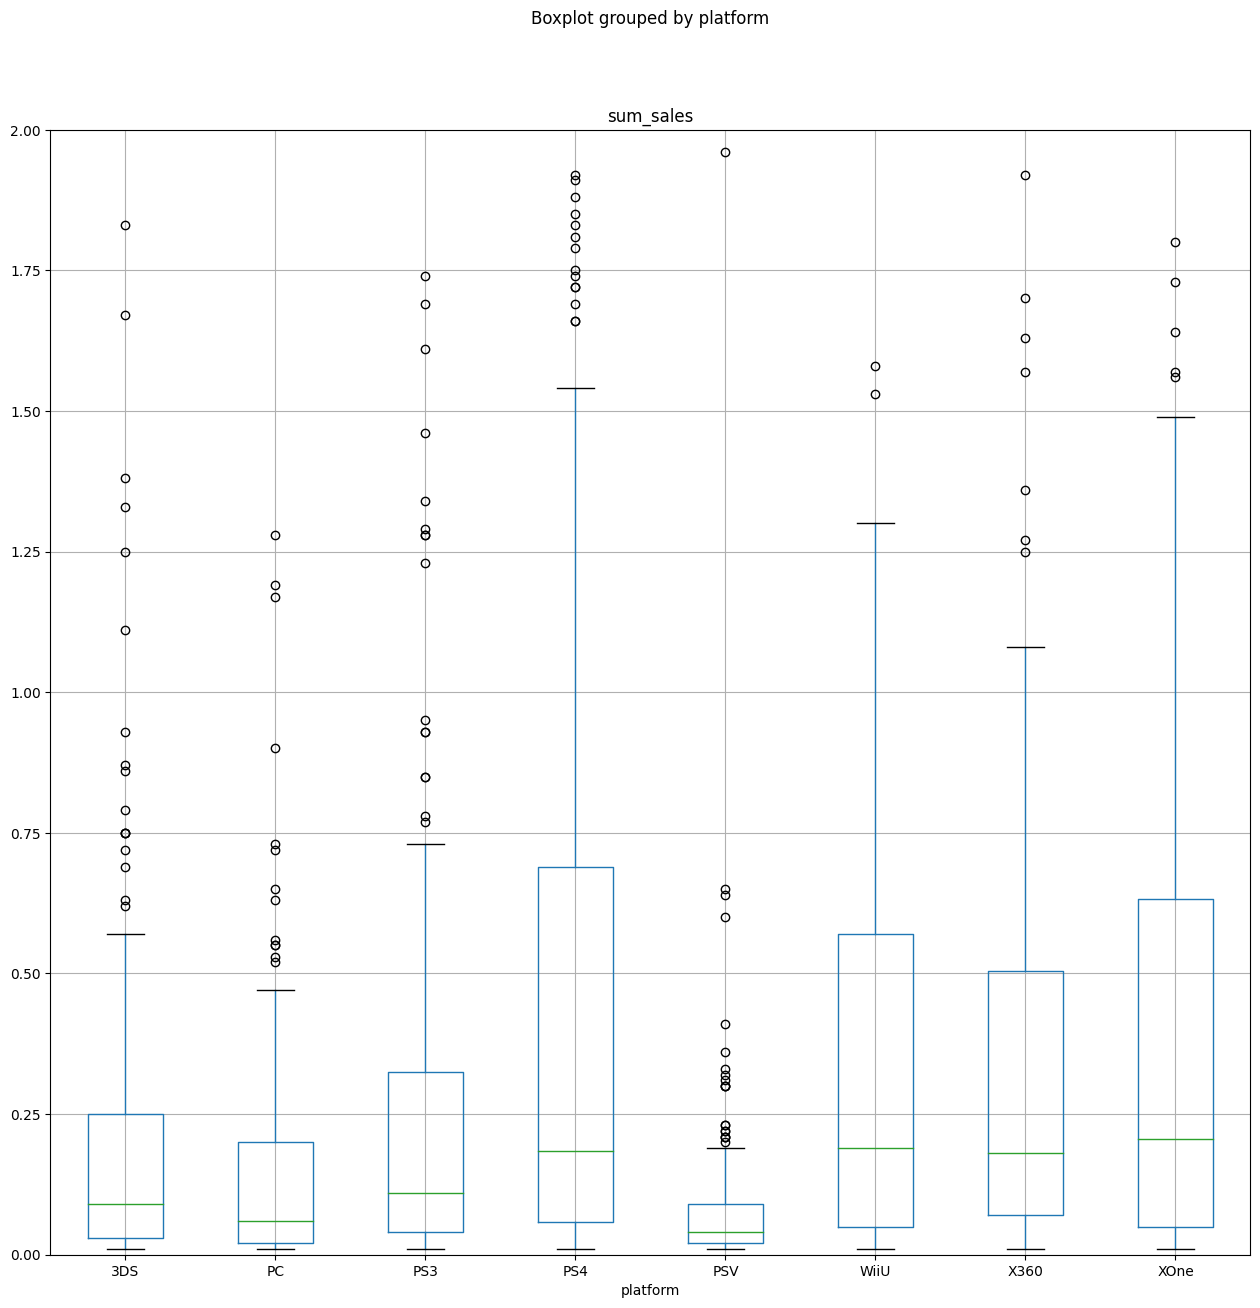

In [38]:
print(data.groupby('platform')['sum_sales'].describe())
data.boxplot(column='sum_sales', by='platform', figsize=(15, 15)).set_ylim(0, 2)

Больше всех продаж у PS4 и XOne на последнем месте. Есть значительные выбросы у 3DS, но если судить по медиане, то 3DS уступает PS4 и XOne.

Теперь посмотрим, <b> как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. </b> Для анализа возьмём платформу PS4, т.к. у этой платформы самые значительные продажи. 

Построим диаграмму рассеяния по платформе PS4, отобразив отзывы пользователей.

<Axes: title={'center': 'Диаграмма рассеяния отзывов пользователей по платформе PS4'}, xlabel='Оценка пользователей', ylabel='Количество продаж'>

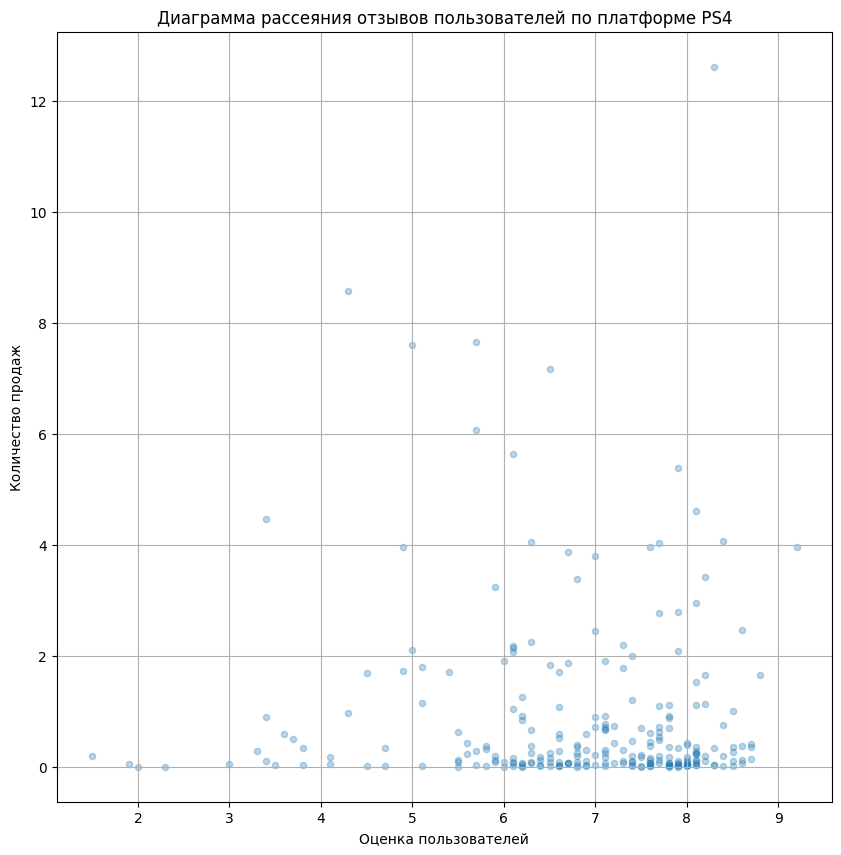

In [39]:
data[data['platform']=='PS4'].plot(x='user_score', y='sum_sales', kind='scatter', alpha=0.3, figsize=(10,10), grid=True, title = "Диаграмма рассеяния отзывов пользователей по платформе PS4", xlabel = "Оценка пользователей", ylabel = "Количество продаж")

Так же построим диаграмму рассеяния по платформе PS4, отобразив отзывы критиков.

<Axes: title={'center': 'Диаграмма рассеяния отзывов критиков по платформе PS4'}, xlabel='Оценка пользователей', ylabel='Количество продаж'>

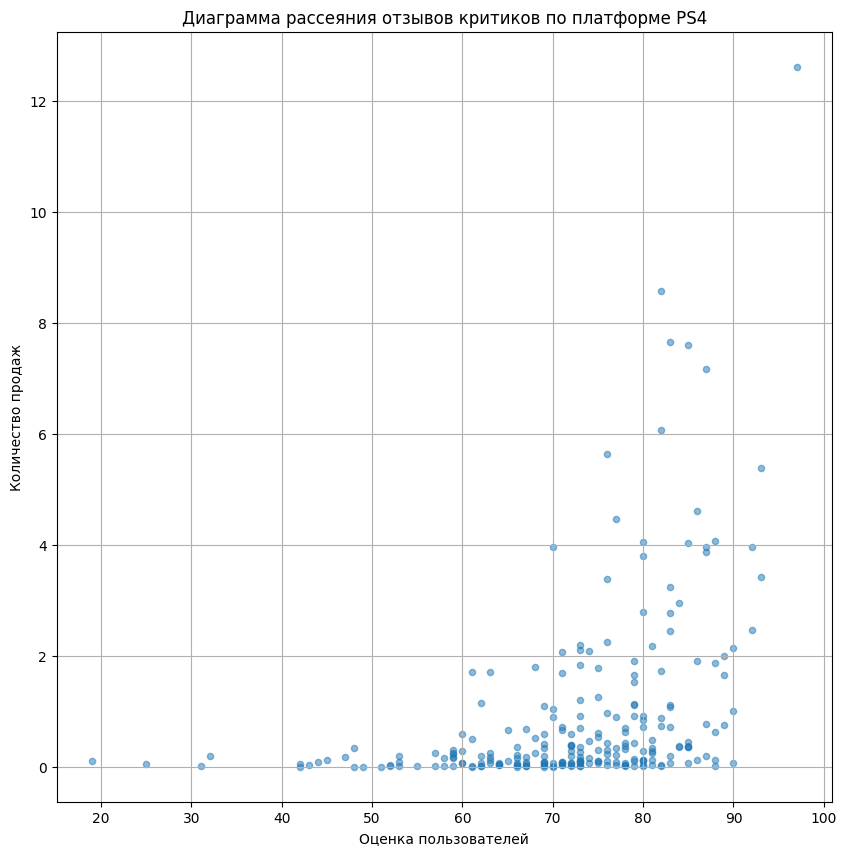

In [40]:
data[data['platform']=='PS4'].plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.5, figsize=(10,10), grid=True, title = "Диаграмма рассеяния отзывов критиков по платформе PS4", xlabel = "Оценка пользователей", ylabel = "Количество продаж")

Посчитаем корреляцию между оценками критиков и продажами

In [41]:
platform_ps4 = data[data['platform']=='PS4']
platform_ps4['critic_score'].corr(platform_ps4['sum_sales'])

0.4026614106810409

Посчитаем корреляцию между оценками пользователей и продажами

In [42]:
platform_ps4['user_score'].corr(platform_ps4['sum_sales'])

-0.04013158947269733

Между оценками критиков и продажами существует положительная корреляция 0.4. Между оценками пользователей и продажами незначительная отрицательная корреляция -0.04. Отсюда можно сделать вывод, что оценка пользователей слабо влияет на продажи, чего не скажешь об оценке критиков. Покупатели прислушиваются больше к критикам, чем к оценкам пользователей.

<b>Соотнесём полученный вывод с продажами игр на других платформах. </b>

Корреляция между отзывами и продажами на 3DS:
оценки критиков: 0.314117492869051;
оценки пользователей: 0.2151932718527028. 

Корреляция между отзывами и продажами на XOne:
оценки критиков: 0.42867694370333187;
оценки пользователей: -0.07038392806475809. 

Корреляция между отзывами и продажами на WiiU:
оценки критиков: 0.370201412480884;
оценки пользователей: 0.40792645792170773. 

Корреляция между отзывами и продажами на PS3:
оценки критиков: 0.44657460493190704;
оценки пользователей: -0.16676141347662118. 

Корреляция между отзывами и продажами на X360:
оценки критиков: 0.5257228356581523;
оценки пользователей: -0.138444570945665. 

Корреляция между отзывами и продажами на PC:
оценки критиков: 0.17463413769350036;
оценки пользователей: -0.07159665703472451. 

Корреляция между отзывами и продажами на PSV:
оценки критиков: 0.04266490657009526;
оценки пользователей: -0.16845504978064446. 



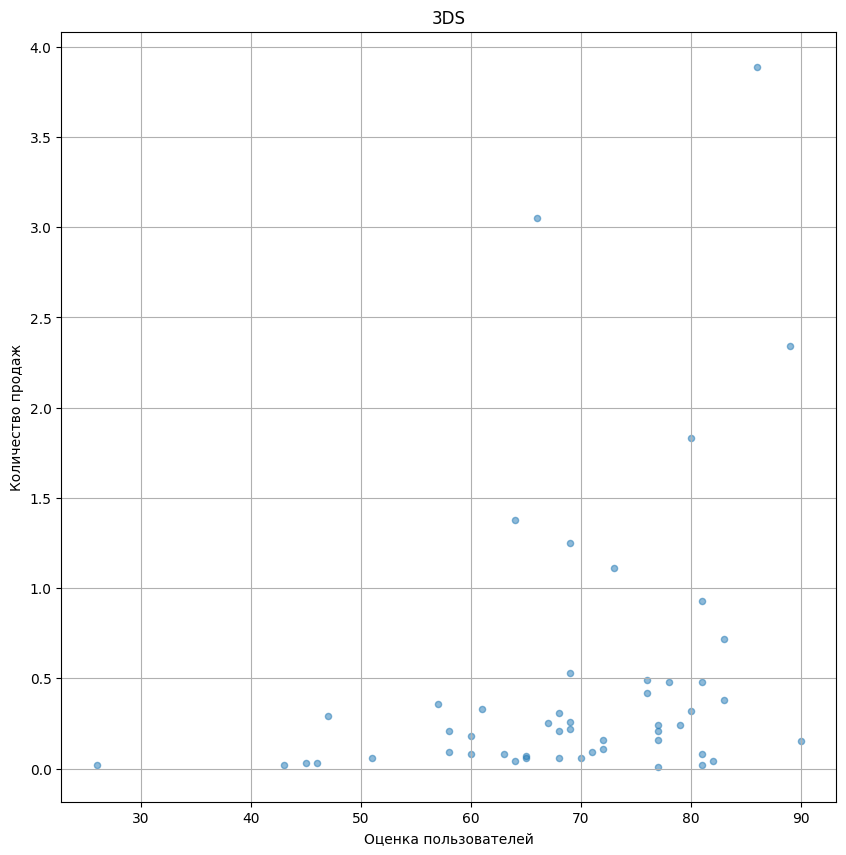

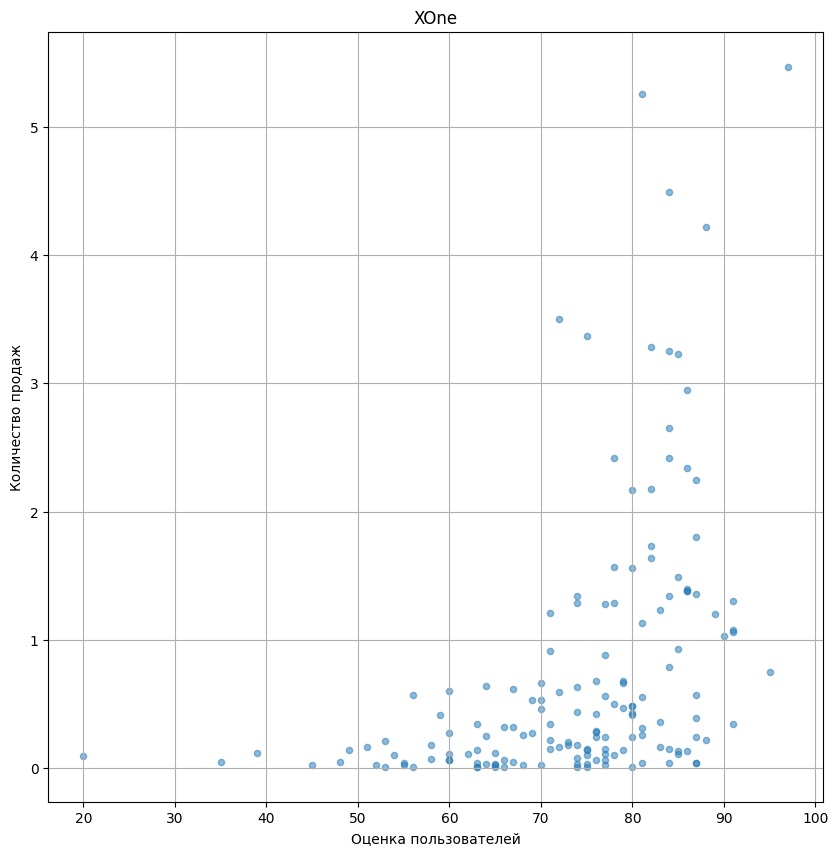

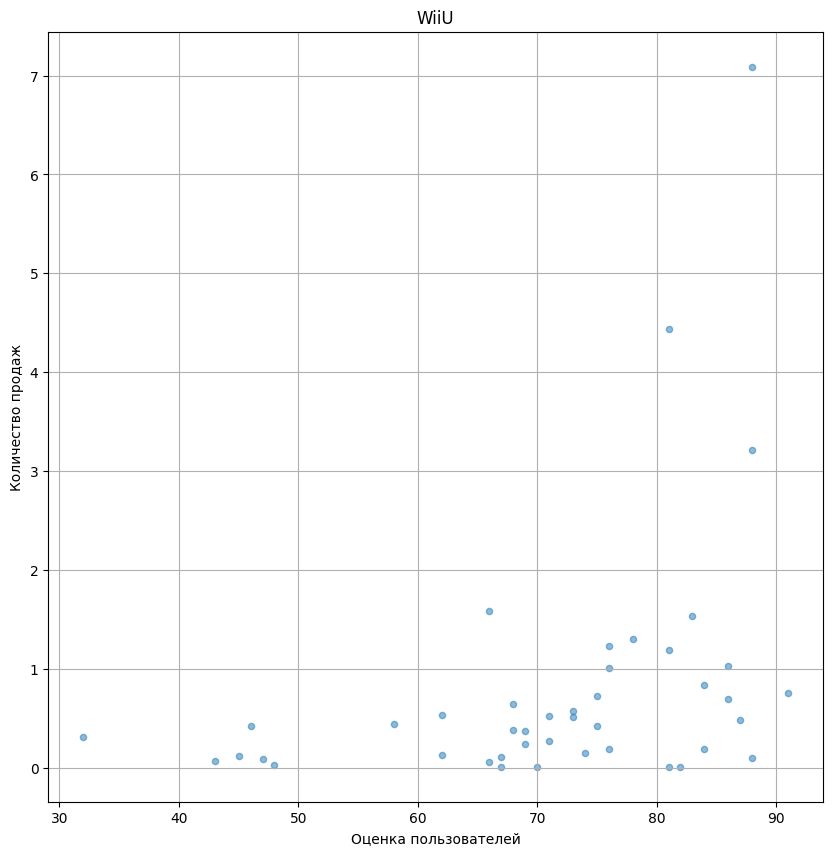

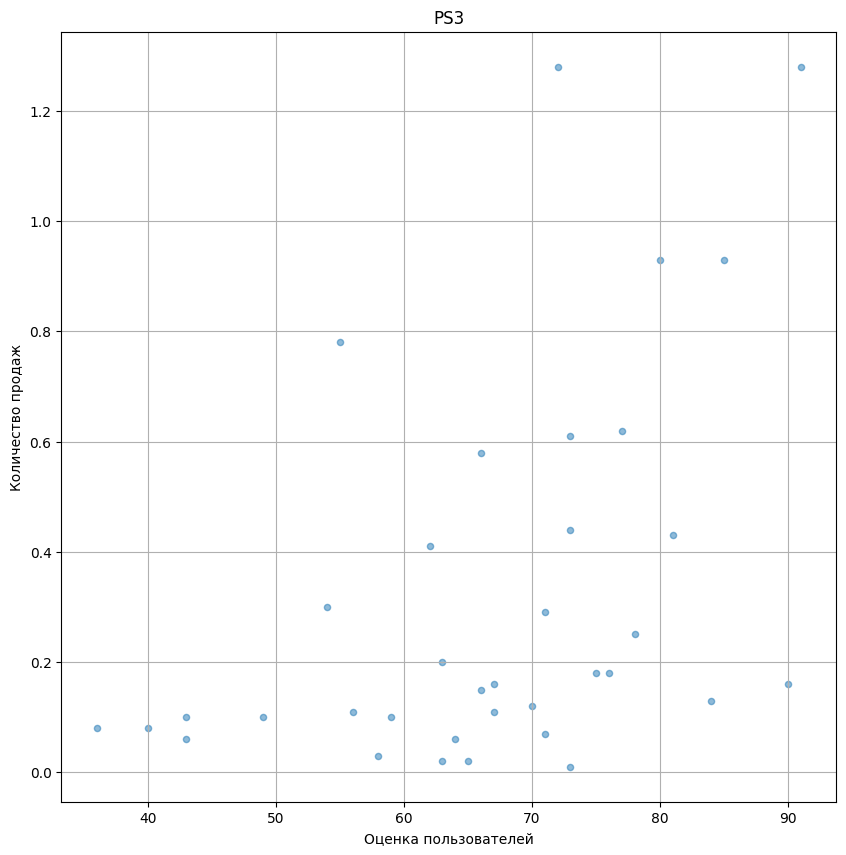

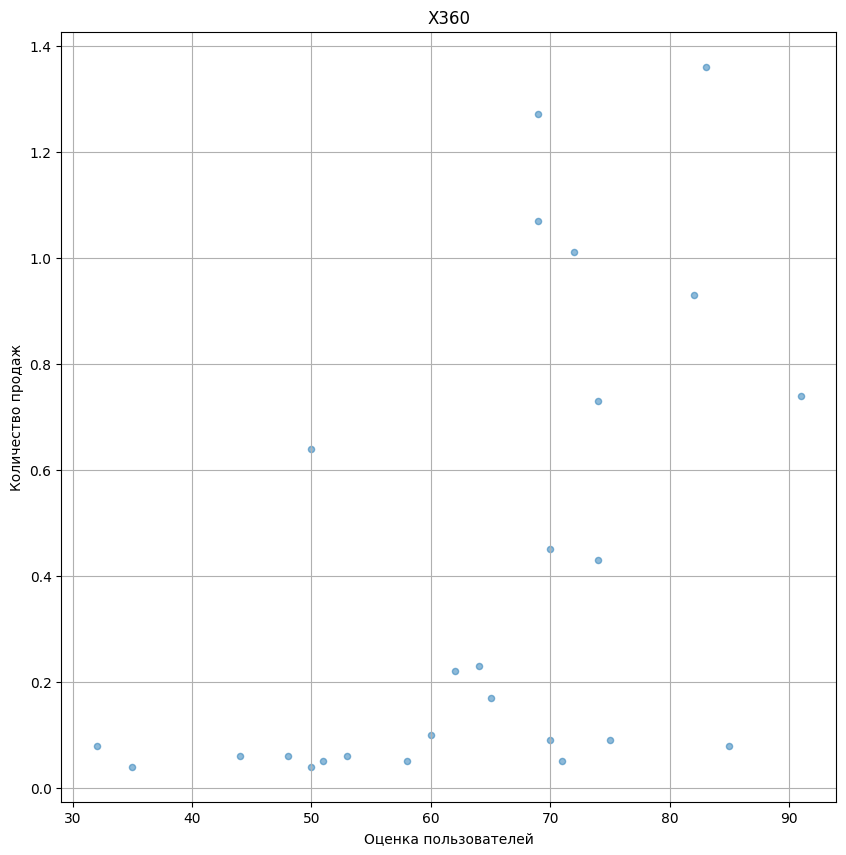

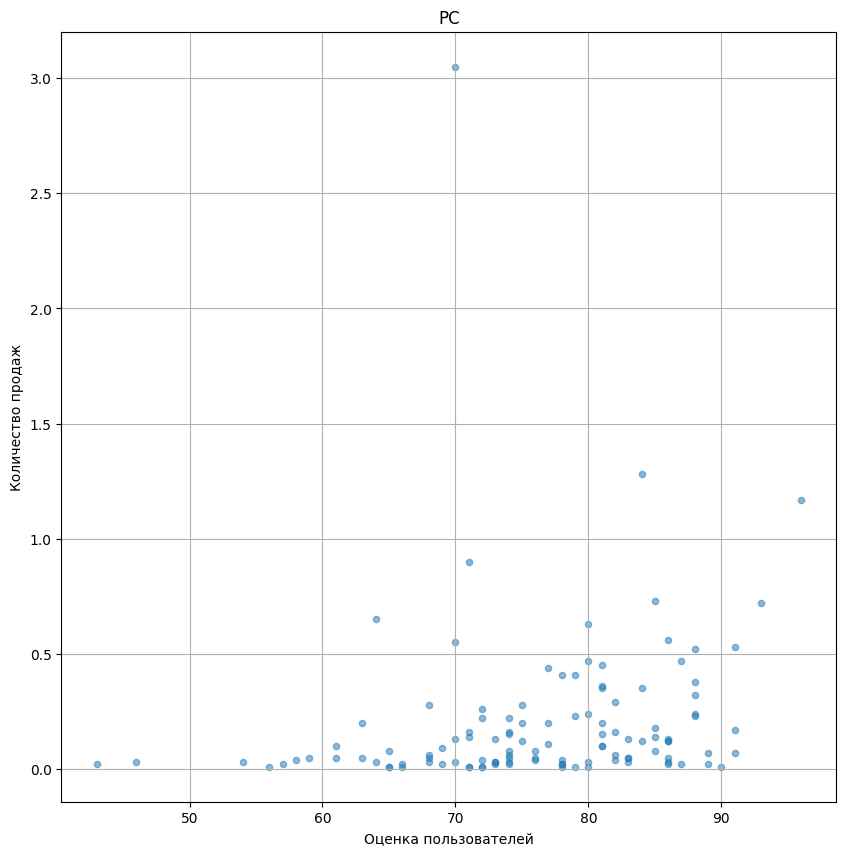

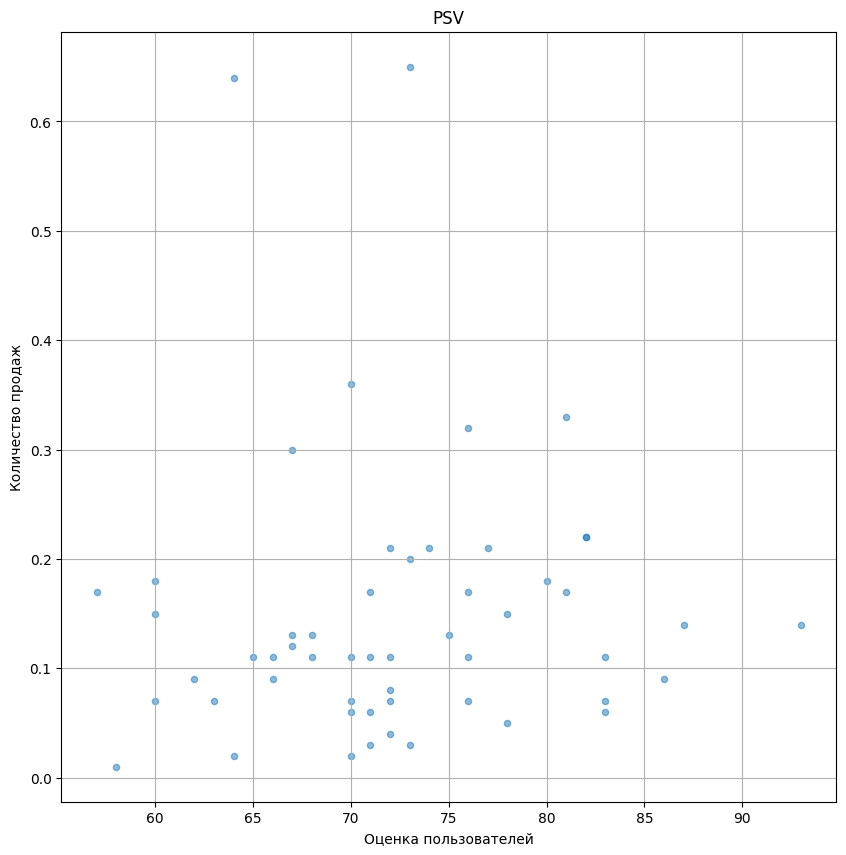

In [43]:
def kor_platform(name_platform):
    print("Корреляция между отзывами и продажами на", name_platform + ':')
    platform = data[data['platform'] == name_platform]
    platform.plot(x='critic_score', y='sum_sales', kind='scatter', alpha=0.5, figsize=(10,10), grid=True, title = name_platform, xlabel = "Оценка пользователей", ylabel = "Количество продаж")
    print("оценки критиков: ", platform['critic_score'].corr(platform['sum_sales']), ';', sep='')
    print("оценки пользователей: ", platform['user_score'].corr(platform['sum_sales']), '.', ' \n', sep='')

for platform in data['platform'].unique():
    if platform != 'PS4': kor_platform(platform)

Тенденция умеренной положительной корреляцией между оценками критиков и продажами, а также незначительной отрицательной между оценками пользователей и продажами продолжает сохраняться на XOne, PS3 и X360. На 3DS и WiiU корреляции незначительны и практически равны. На PC и PSV обе корреляции незначительны.

<b> Исследуем общее распределение игр по жанрам </b>

Выведем жанры и их продажи

              sum_sales
genre                  
Shooter           0.515
Sports            0.180
Platform          0.140
Fighting          0.125
Role-Playing      0.110
Simulation        0.100
Action            0.090
Misc              0.090
Racing            0.090
Strategy          0.060
Puzzle            0.045
Adventure         0.030


<Axes: title={'center': 'Распределение игр по жанрам'}, xlabel='Жанр игры', ylabel='Количество продаж'>

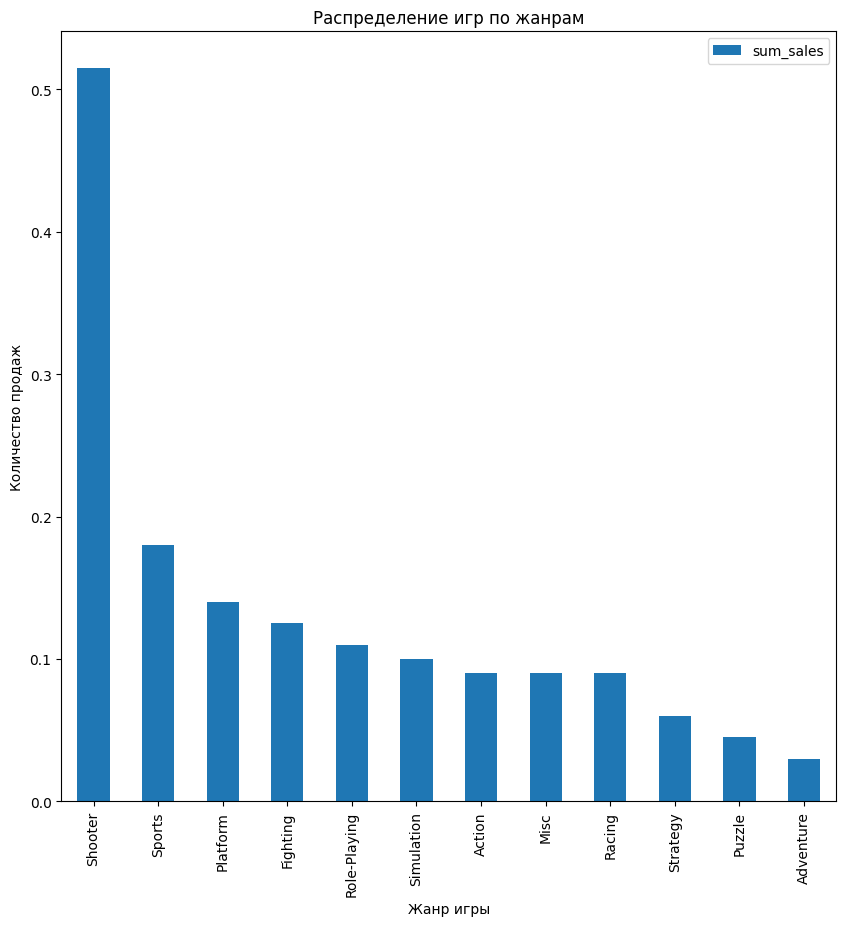

In [44]:
genre_pivot = data.pivot_table(index='genre', values='sum_sales', aggfunc='median').sort_values(by='sum_sales', ascending=False)
print(genre_pivot)
genre_pivot.plot.bar(title = "Распределение игр по жанрам", xlabel = "Жанр игры", ylabel = "Количество продаж", figsize=(10, 10))

По прибыли с отрывом лидирует жанр Shooter. Среди всех жанров выделяются жанры с высокими продажами: Sports, Platform и Fighting, также выделяются жанры с низкими продажами: Strategy, Puzzle и Adventure.

<b> Вывод </b>

* "Бум" на компьютерные игры случился в конце 90-х и пошел на спад где-то в 2010.
* Самые популярные платформы с наибольшими суммарными продажами за всё время: PS, DS, Wii, PS3, X360, PS2
* Характерный срок появления новых и исчезновенения старых платформ - 10 лет.
* PS4 и XOne являются потенциально прибыльными.
* Практически у всех платформ между оценками критиков и продажами существует положительная корреляция, а между оценками пользователей и продажами незначительная отрицательная корреляция. Отсюда можно сделать вывод, что оценка пользователей слабо влияет на продажи, чего не скажешь об оценке критиков. Покупатели прислушиваются больше к критикам, чем к оценкам пользователей.

### 4. Портрет пользователя каждого региона

Самые популярные платформы (топ-5) в Северной Америке
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64


Доля от общего рынка в Северной Америке (%)
platform
X360    58.69
XOne    57.90
PS4     34.22
PS3     32.34
3DS     26.12
dtype: float64


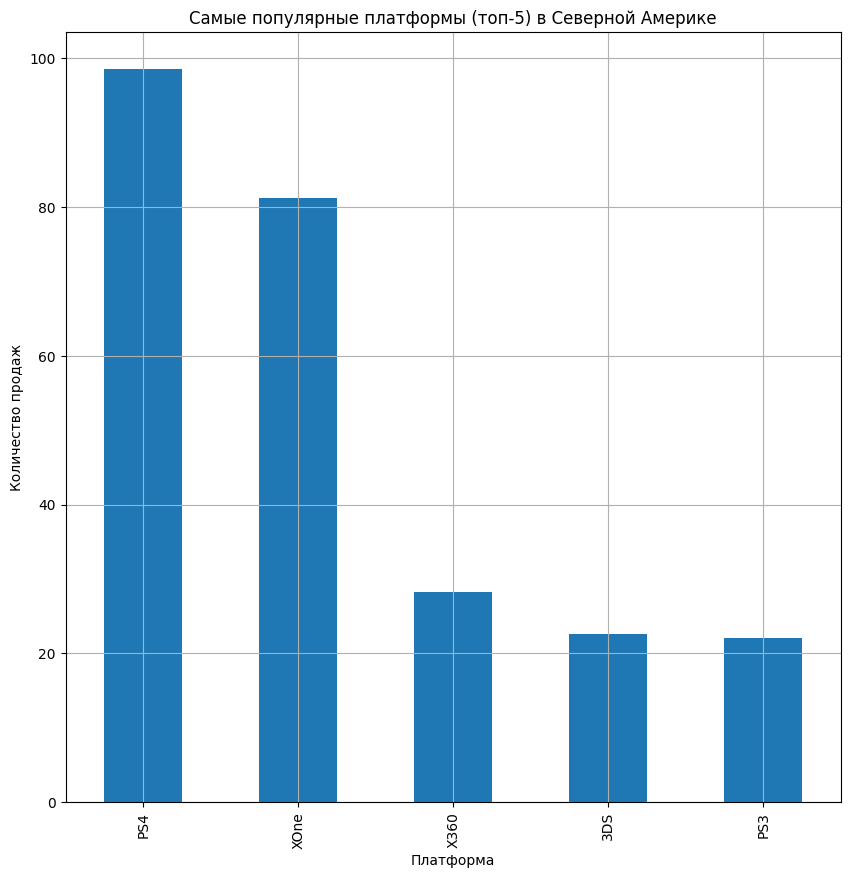

Самые популярные жанры (топ-5) в Северной Америке
genre
Shooter         79.02
Action          72.10
Sports          45.98
Role-Playing    33.47
Misc            13.59
Name: na_sales, dtype: float64


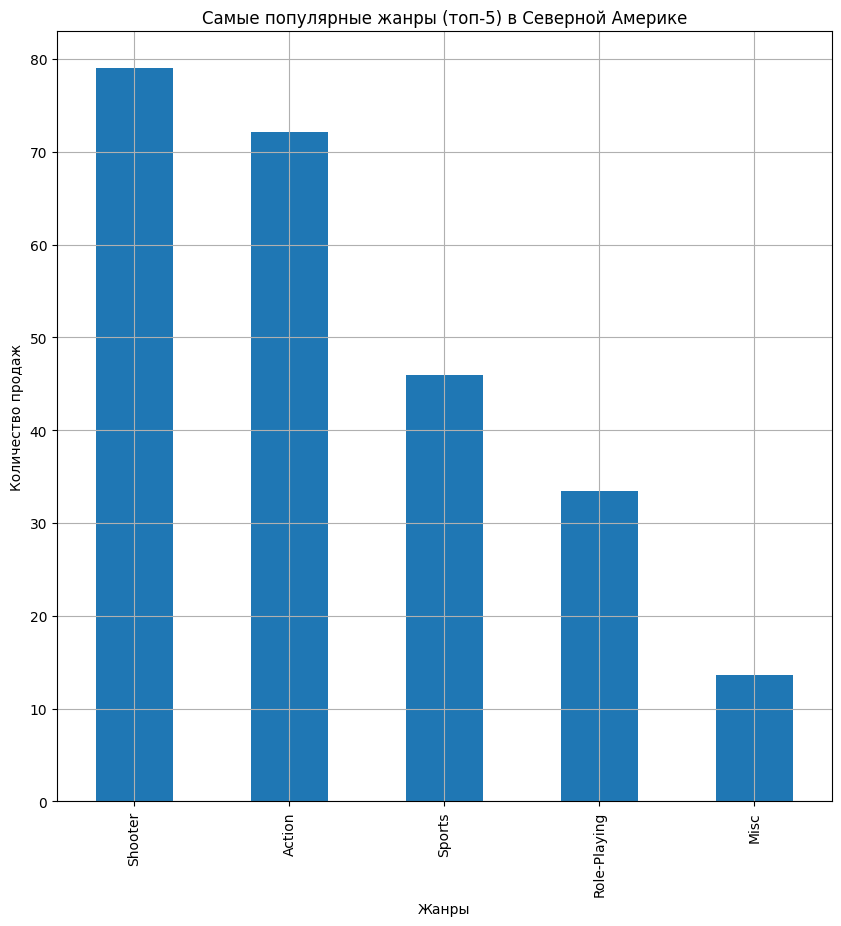

Влияние рейтинга ESRB на продажи в Северной Америке
rating
M       0.120
E10+    0.095
E       0.050
T       0.030
0       0.000
Name: na_sales, dtype: float64


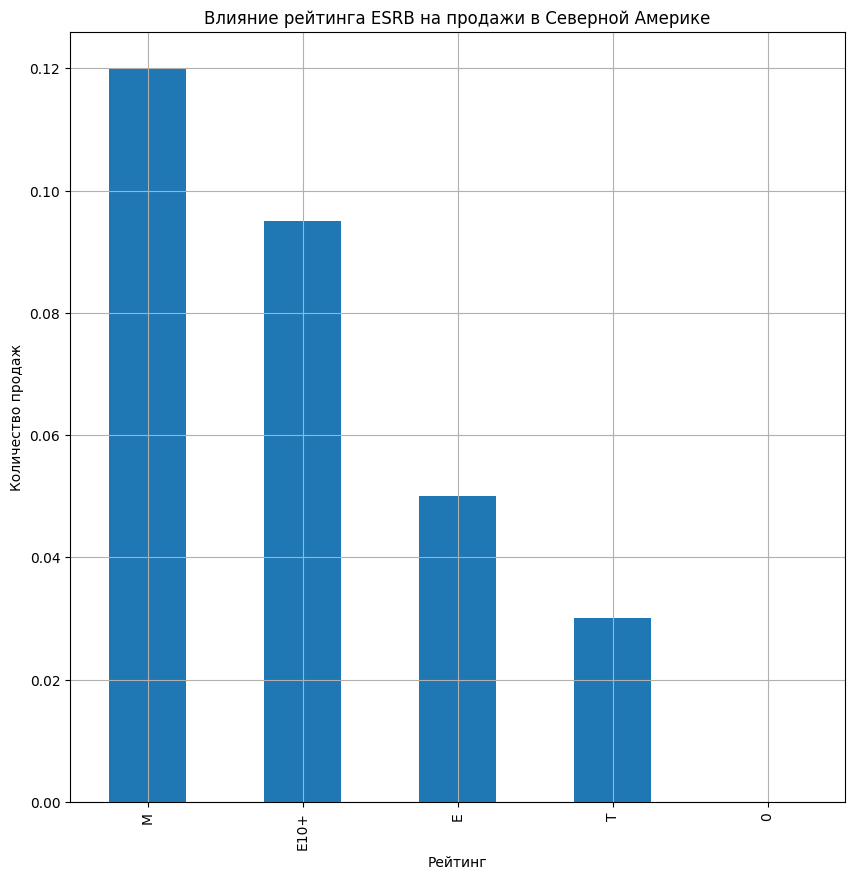

Самые популярные платформы (топ-5) в Европе
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64


Доля от общего рынка в Европе (%)
platform
PC      66.43
PS4     45.13
PS3     37.46
XOne    32.95
3DS     18.60
dtype: float64


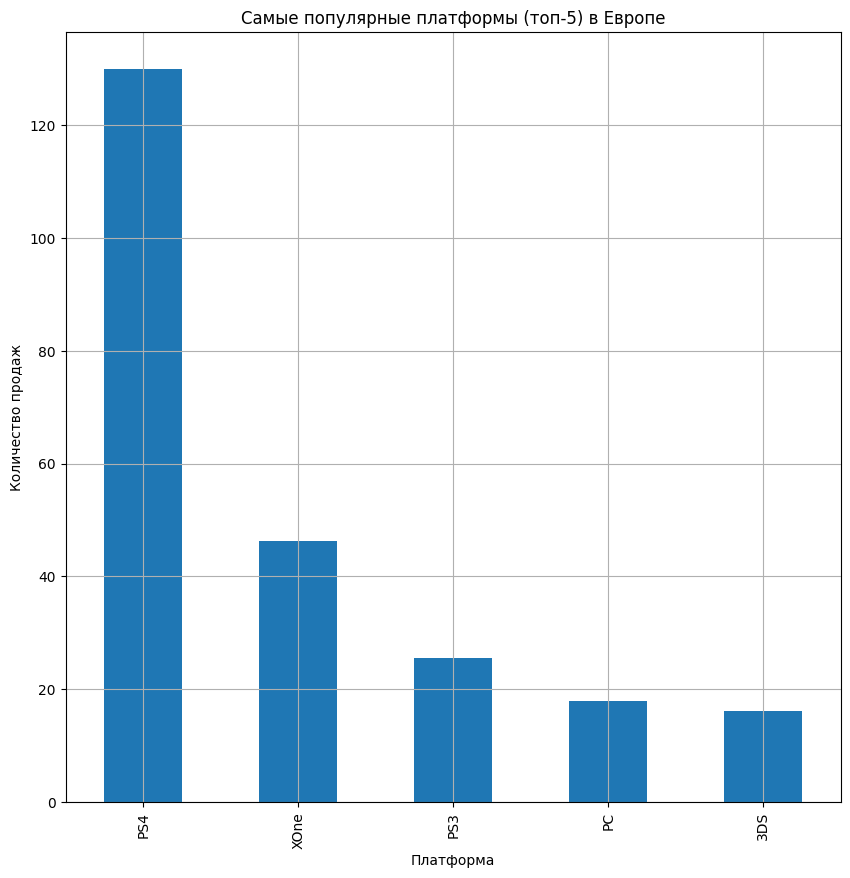

Самые популярные жанры (топ-5) в Европе
genre
Action          74.01
Shooter         65.52
Sports          45.36
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


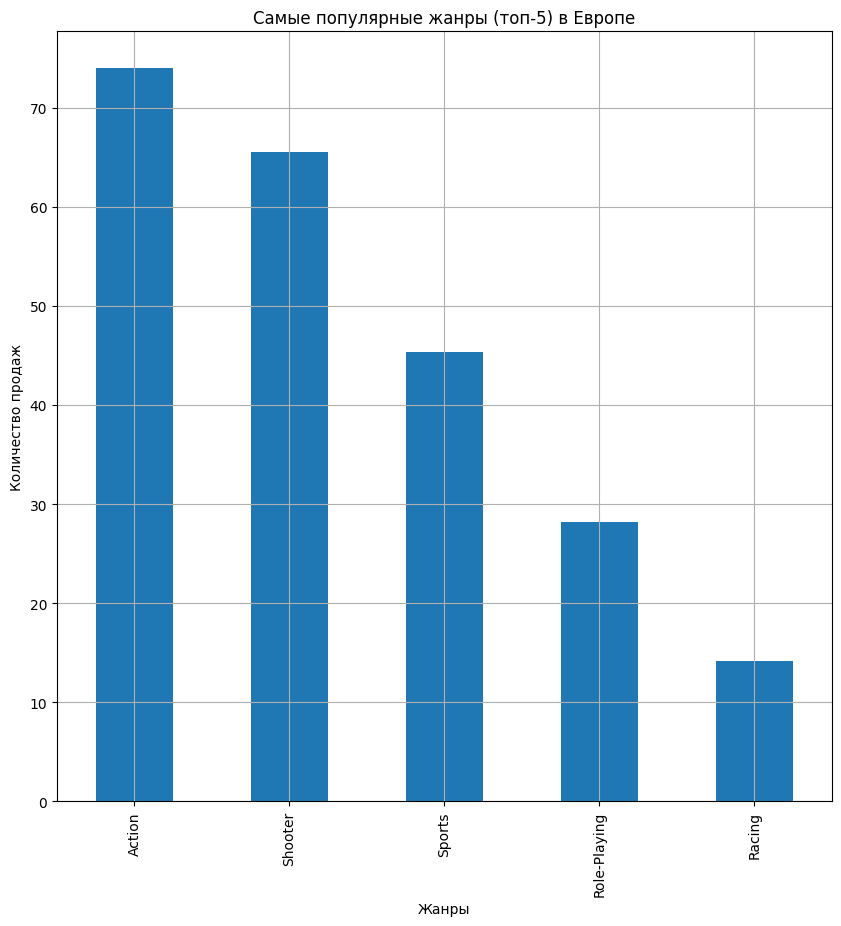

Влияние рейтинга ESRB на продажи в Европе
rating
M       0.12
E10+    0.08
E       0.05
T       0.04
0       0.00
Name: eu_sales, dtype: float64


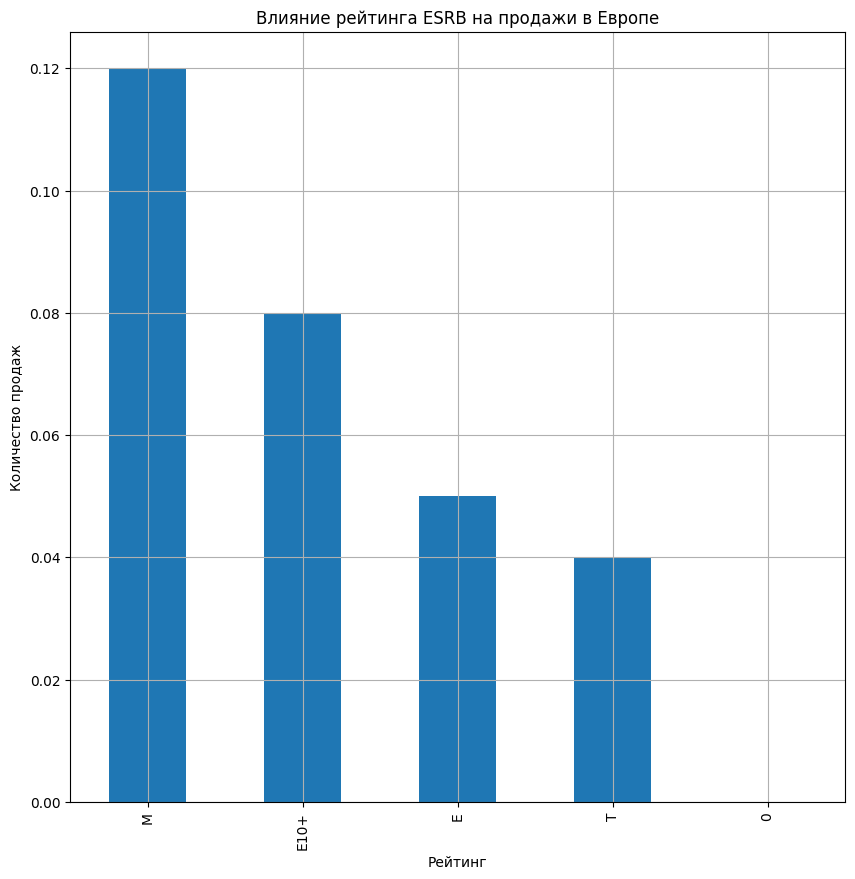

Самые популярные платформы (топ-5) в Японии
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64


Доля от общего рынка в Японии (%)
platform
PSV     64.91
3DS     51.04
WiiU    17.01
PS3     16.46
PS4      5.21
dtype: float64


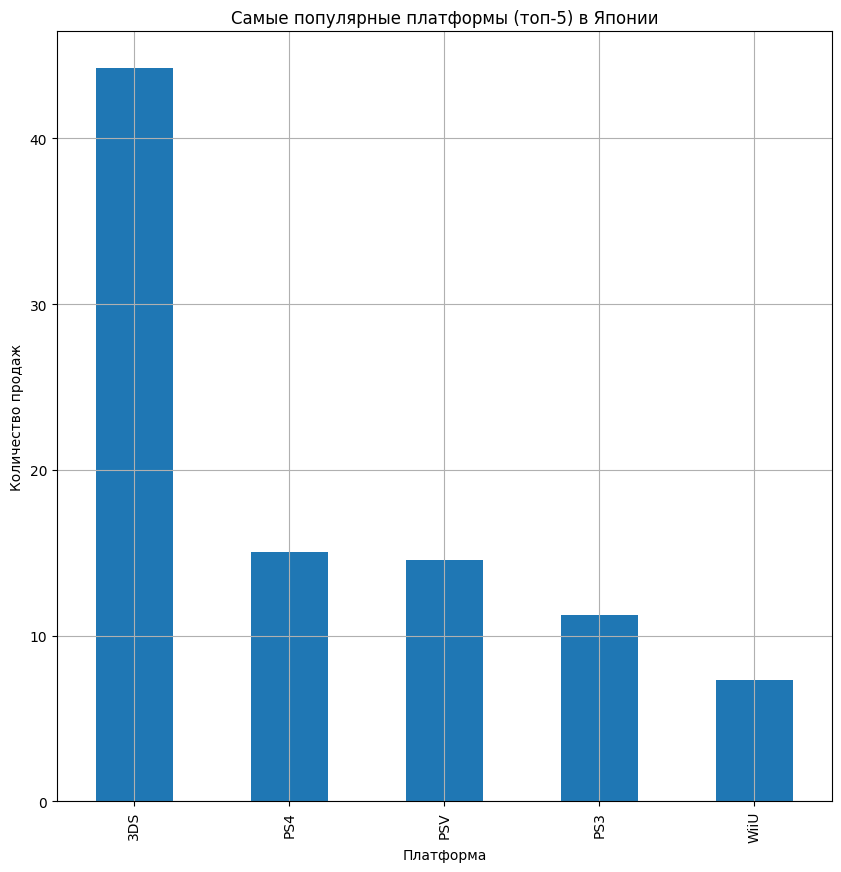

Самые популярные жанры (топ-5) в Японии
genre
Role-Playing    31.16
Action          29.38
Fighting         6.37
Misc             5.59
Shooter          4.87
Name: jp_sales, dtype: float64


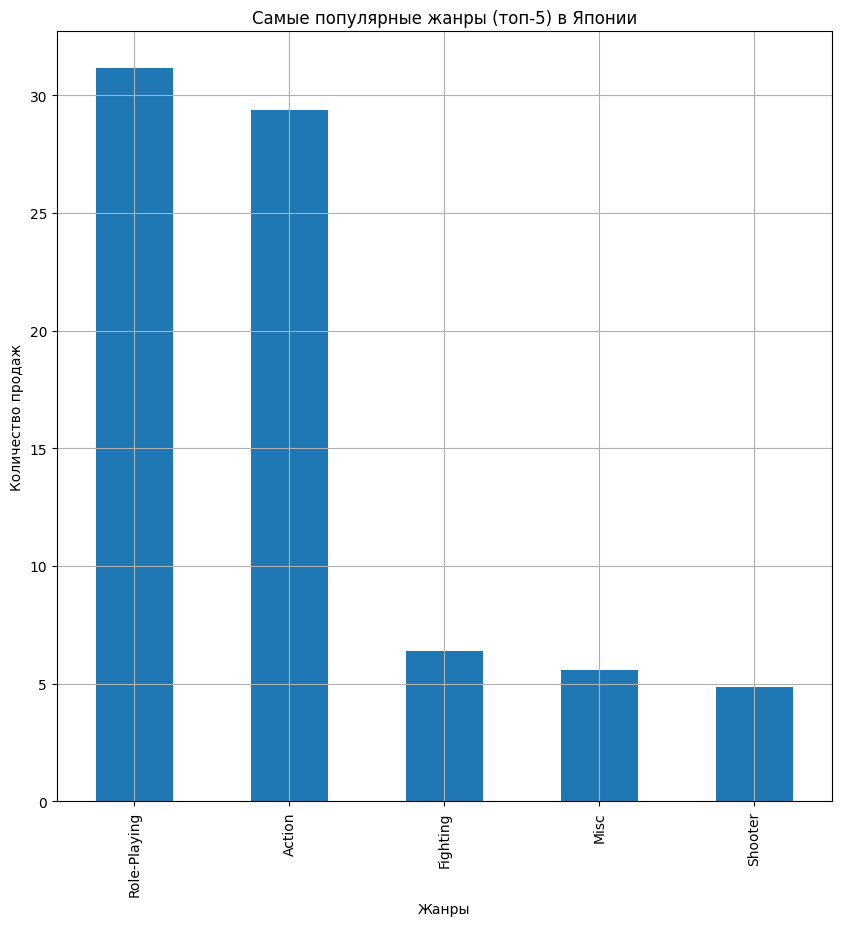

Влияние рейтинга ESRB на продажи в Японии
rating
0       0.02
T       0.01
E       0.00
E10+    0.00
M       0.00
Name: jp_sales, dtype: float64


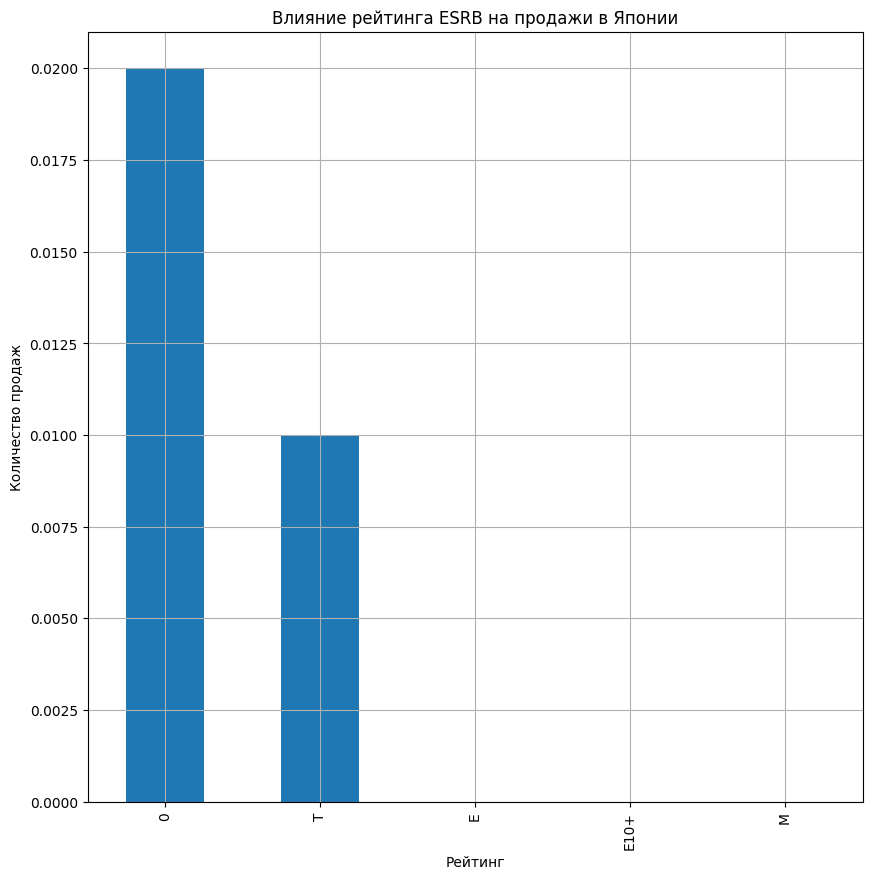

Самые популярные платформы (топ-5) в других странах
platform
PS4     44.48
XOne    12.52
PS3      9.37
X360     4.35
3DS      3.68
Name: other_sales, dtype: float64


Доля от общего рынка в других странах (%)
platform
PS4     15.44
PS3     13.74
X360     9.02
XOne     8.92
3DS      4.25
dtype: float64


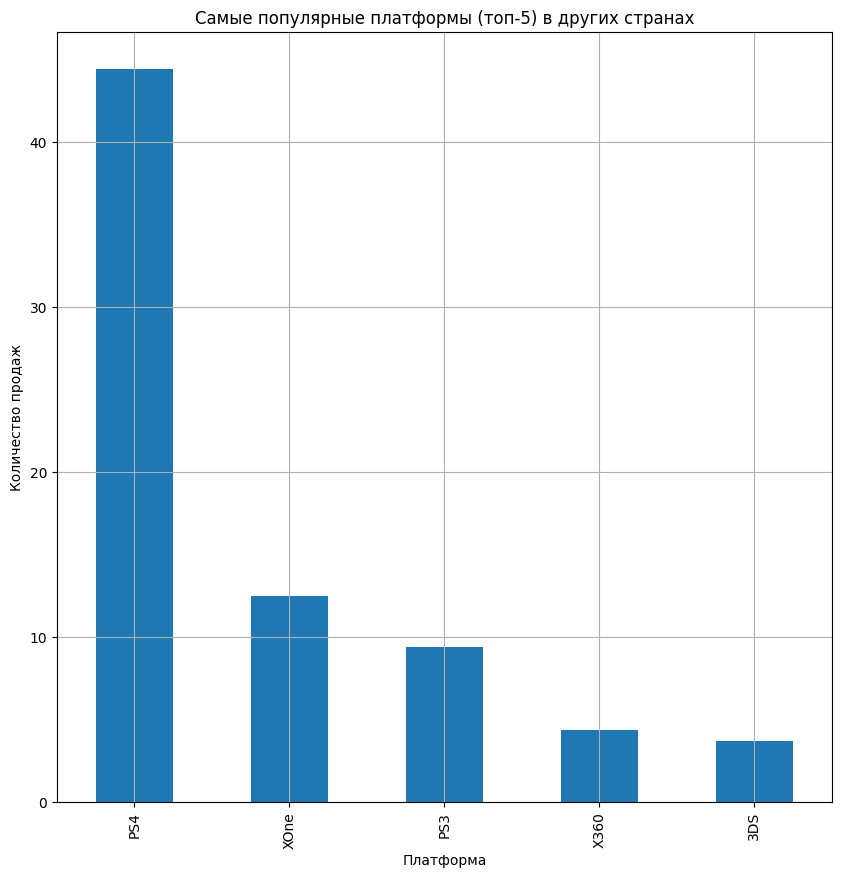

Самые популярные жанры (топ-5) в других странах
genre
Action          22.48
Shooter         21.53
Sports          14.32
Role-Playing     8.64
Misc             3.77
Name: other_sales, dtype: float64


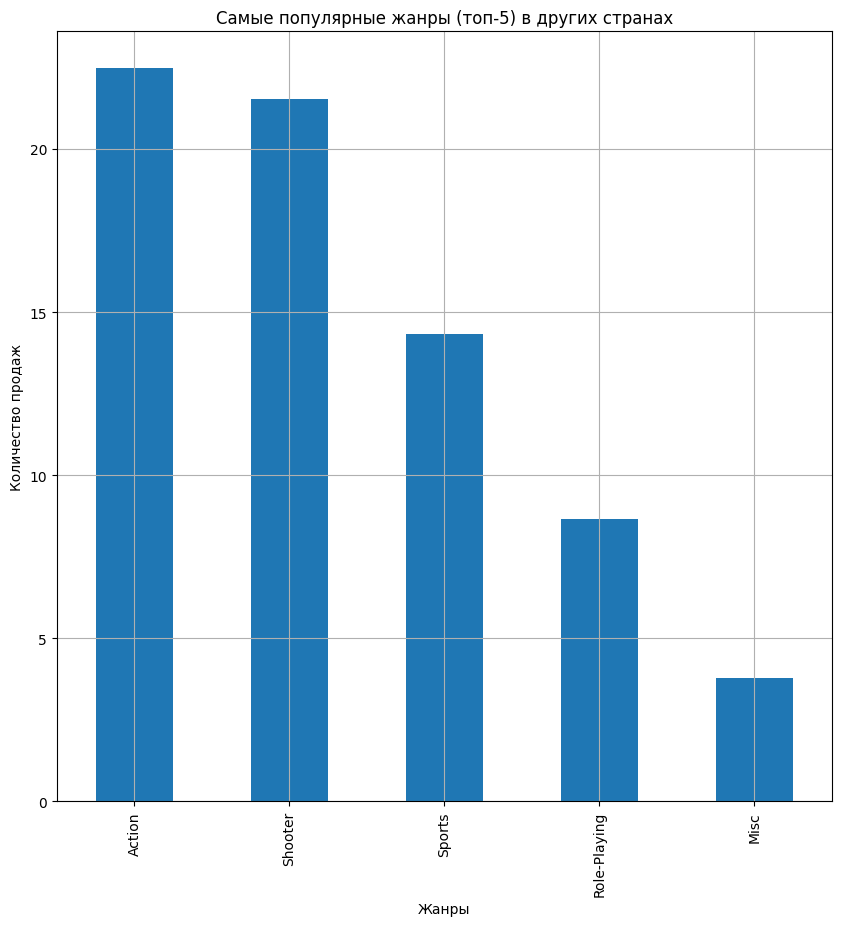

Влияние рейтинга ESRB на продажи в других странах
rating
M       0.03
E10+    0.02
E       0.01
T       0.01
0       0.00
Name: other_sales, dtype: float64


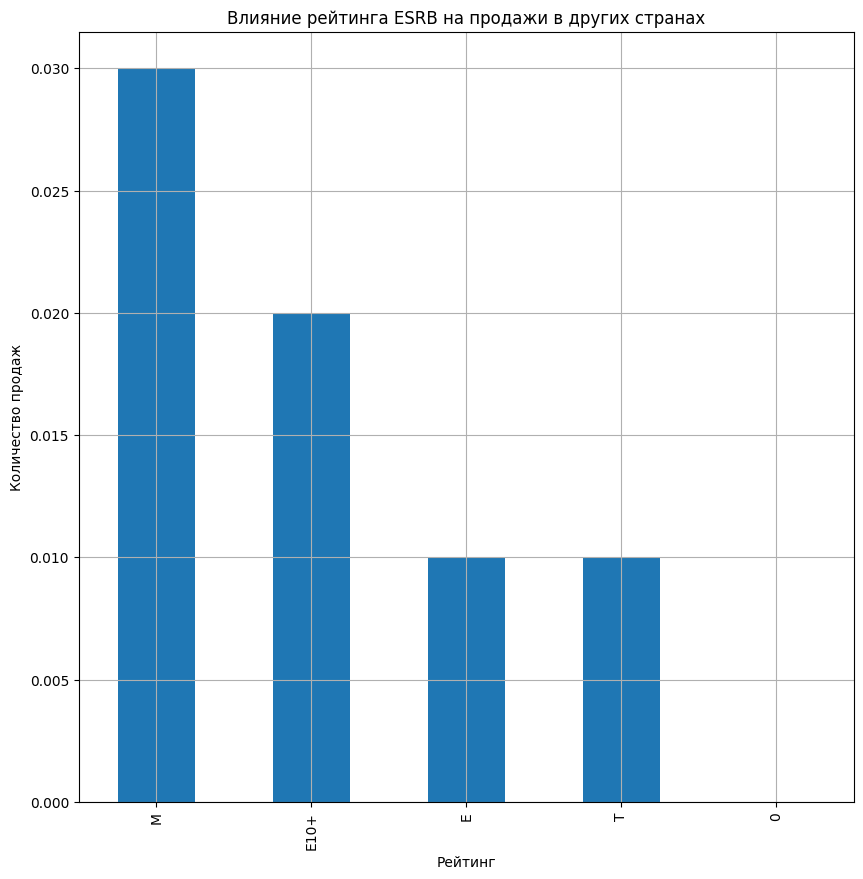

In [45]:
import matplotlib.pyplot as plt

list_of_regions = ['na_sales',
                  'eu_sales',
                  'jp_sales',
                  'other_sales']

platform_all = data.groupby('platform')['sum_sales'].sum()


def popular_platforms(region, name):
    platform = data.groupby('platform')[region].sum().sort_values(ascending=False).head()
    print('Самые популярные платформы (топ-5) в', name)
    print(platform)
    print('\n')
    percent = round(platform / platform_all * 100, 2).sort_values(ascending=False).head()
    print('Доля от общего рынка в', name, '(%)')
    print(percent)
    plt.figure()
    platform.plot(x = 'platform', y = region, kind = 'bar', figsize = (10, 10), grid=True, title = f'Самые популярные платформы (топ-5) в {name}', xlabel = "Платформа", ylabel = "Количество продаж")
    plt.show()
    
    
def popular_genre(region, name):
    genre = data.groupby('genre')[region].sum().sort_values(ascending=False).head()
    print('Самые популярные жанры (топ-5) в', name)
    print(genre)
    plt.figure()
    genre.plot(x = 'genre', y = region, kind = 'bar', figsize = (10, 10), grid=True, title = f'Самые популярные жанры (топ-5) в {name}', xlabel = "Жанры", ylabel = "Количество продаж")
    plt.show()


def popular_rating(region, name):
    rating = data.groupby('rating')[region].median().sort_values(ascending=False)
    print('Влияние рейтинга ESRB на продажи в', name)
    print(rating)
    plt.figure()
    rating.plot(x = 'rating', y = region, kind = 'bar', figsize = (10, 10), grid=True, title = f'Влияние рейтинга ESRB на продажи в {name}', xlabel = "Рейтинг", ylabel = "Количество продаж")
    plt.show()
    
    
for entry in list_of_regions:
    if entry == 'na_sales':
        name = 'Северной Америке'
    elif entry == 'eu_sales':
        name = 'Европе'
    elif entry == 'jp_sales':
        name = 'Японии'
    else: name = 'других странах'    
    popular_platforms(entry, name)
    popular_genre(entry, name)
    popular_rating(entry, name)

<b> Вывод </b>

Самые популярные платформы (топ-5): 
* в Северной Америке:
    * PS4
    * XOne
    * X360
    * 3DS
    * PS3
* в Европе:
    * PS4
    * XOne
    * PS3
    * PC
    * 3DS 
* в Японии:
    * 3DS
    * PS4
    * PSV
    * PS3
    * WiiU
* в других странах:
    * PS4
    * XOne
    * PS3
    * X360
    * 3DS
     
На Северную Америку приходится самая большая доля продаж для платформы X360 (58.69 %) от мирового рынка.
На Европу приходится самая большая доля продаж для платформы PC (66.43 %) от мирового рынка.
На Японию приходится самая большая доля продаж для платформы PSV (64.91 %) от мирового рынка.
На другие страны приходится самая большая доля продаж для платформы PS4 (15.44 %) от мирового рынка.    
    
    
Самые популярные жанры (топ-5):
* в Северной Америке:
    * Shooter
    * Action
    * Sports
    * Role-Playing
    * Misc
* в Европе:
    * Action
    * Shooter
    * Sports
    * Role-Playing
    * Racing     
* в Японии:
    * Role-Playing
    * Action
    * Fighting
    * Misc
    * Shooter  
* в других странах:
    * Action
    * Shooter
    * Sports
    * Role-Playing
    * Misc
    
Влияние рейтинга ESRB на продажи:
* в Северной Америке:
    * M («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
    * E10+ («Everyone 10 and older») — «Для всех от 10 лет и старше»
    * E («Everyone») — «Для всех»
    * T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.
    * 0 (без рейтинга) - медианное значение равно 0.
* в Европе:
    * M
    * E10+
    * E
    * T
    * 0 - медианное значение равно 0.
* в Японии:
    * 0
    * T
    * E - медианное значение равно 0.
    * E10+ - медианное значение равно 0.
    * M - медианное значение равно 0.
* в других странах:
    * M
    * E10+
    * E
    * T
    * 0 - медианное значение равно 0.
    
Во всем мире, кроме Японии, по продажам лидируют игры с рейтингом (по убыванию): M, E10+, E, T. В Японии закономерность следующая: 0 (без рейтинга), T. Можно сделать вывод о том, что в Японии покупают игры от локальных разработчиков, которые создают продукты для внутреннего рынка и имеют собственную систему рейтинга.

### 5. Проверим гипотезы

<b> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</b>

Сформулируем нулевые гипотезы:
   * Нулевая гипотеза H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
   * Альтернативная гипотеза H_1: Средние пользовательские рейтинги платформ Xbox One и PC различаются.

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var).

Рассмотрим три аспекта, которые надо проверить, чтобы понять, можно ли применять t-тест:
1. Генеральные совокупности не должны зависеть друг от друга.
    * В нашем случае совокупности независимы
2. Выборочные средние должны быть нормально распределены.
    * Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Это утверждение верно, даже если сама генеральная совокупность не распределена нормально.


In [46]:
from scipy import stats as st

xone = data[data['platform'] == 'XOne']['user_score']
pc = data[data['platform'] == 'PC']['user_score']
print(xone.count())
print(pc.count())

165
122


Наши совокупности имеют намного больше значений, чем несколько десятков, поэтому этот аспект выполняется.

3. Дисперсии рассматриваемых генеральных совокупностей должны быть равны.
    * Это коварное условие. С одной стороны, мы никогда точно не знаем, равны ли дисперсии рассматриваемых генеральных совокупностей. С другой — по умолчанию параметр equal_var принимает значение True: дисперсии считаются равными, и тест объединяет обе выборки в одну, чтобы эту дисперсию поточнее оценить. При этом если выборки достаточно велики (30 и больше значений) и равны по размеру между собой, то такой подход оправдан: симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается. В итоге, у нас достаточно большие, но разные по размеру выборки, поэтому укажем параметр equal_var = False, и тест посчитает дисперсии выборок по отдельности.

In [47]:
results = st.ttest_ind(xone.dropna(), pc.dropna(), equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


С вероятностью в 11% можно получить разные пользовательские рейтинги платформ Xbox One и PC.

<b>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</b>

Сформулируем нулевые гипотезы:
   * Нулевая гипотеза H_0: Средние пользовательские рейтинги жанров Action и Sports одинаковые;
   * Альтернативная гипотеза H_1: Средние пользовательские рейтинги жанров Action и Sports различаются.

Аналогично проведенному выше исследованию проверим 3 аспекта:
1. Совокупности независимы

In [48]:
genre_action = data[(data['genre'] == 'Action')]['user_score']
genre_sports = data[(data['genre']=='Sports')]['user_score']
print(genre_action.count())
print(genre_sports.count())

297
126


2. Совокупности достаточно большие.
3. Совокупности разные по размеру, поэтому укажем параметр equal_var = False

In [49]:
results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var = False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.132579125573844e-14
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Средние пользовательские рейтинги жанров Action и Sports различаются.

<b> Вывод </b>

Проверили гипотезы:
   * Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Не получилось отвергнуть нулевую гипотезу.
   * Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

### 6. Общий вывод

* В ходе выполнения проектной работы была осуществлена предобработка данных: обработаны пропущенные значения там, где это необходимо, заменены типы данных на необходимые, приведены к нижнему регистру  названия столбцов, все столбцы проверены на аномалии, строки проверены на явные дубликаты. 
* Посчитаны суммарные продажи во всех регионах и записаны в отдельный столбец.
* Определили, что аббревиатура tbd  аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. То есть данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа.
* Были выбраны платформы с наибольшими суммарными продажами за весь период:
    * PS
    * DS
    * Wii
    * PS3
    * X360
    * PS2
* Обнаружен характерный срок появления новых и исчезновенения старых платформ - 10 лет.
* Определили, что PS4 и XOne являются потенциально прибыльными.
* Практически у всех платформ между оценками критиков и продажами существует положительная корреляция, а между оценками пользователей и продажами незначительная отрицательная корреляция. Отсюда можно сделать вывод, что оценка пользователей слабо влияет на продажи, чего не скажешь об оценке критиков. Покупатели прислушиваются больше к критикам, чем к оценкам пользователей.
* Составили портреты пользователей каждого региона:
    1. Северная Америка - геймер играет на PS4 в шутеры с возрастным цензом «Для взрослых» (от 17 лет).
    2. Европа - геймер играет на PS4 в экшн с возрастным цензом «Для взрослых».
    3. Япония - геймер играет на 3DS в РПГ в локальные или иностранные игры, не получившие рейтинг от ESRB.
    4. Другие страны  - геймер играет на PS4 в экшн с возрастным цензом «Для взрослых».
* Выявлены интересные факты:
    * На Северную Америку приходится самая большая доля продаж для платформы X360 (58.69 %) от мирового рынка.
    * На Европу приходится самая большая доля продаж для платформы PC (66.43 %) от мирового рынка.
    * На Японию приходится самая большая доля продаж для платформы PSV (64.91 %) от мирового рынка.
    * На другие страны приходится самая большая доля продаж для платформы PS4 (15.44 %) от мирового рынка.
    
    
Исходя из анализа, есть основания полагать, что в 2017 году стоит продавать шутеры на Sony Playstation 4 «Для взрослых».